# CS 6220 Data Mining — Assignment 4
## Jianhao Zhou
## Github: eqiowtj
## zhou.jianh@northeastern.edu

## Question 1
### 1a

In [83]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

df_truck = np.array(pd.read_csv(
    'data/f150_motor_distributors.txt', header=None))
ini_truck = np.array([[10.0, 10.0], [-10.0, -10.0],
                      [2.0, 2.0], [3.0, 3.0], [-3.0, -3.0]])

def kmeans(data, k, initialization, distance_function):
    centroids = np.array(initialization)
    curr_labels = np.zeros(len(data))
    def get_label(x):
        min_dist, min_i = float("inf"), None
        for i in range(k):
            dist = distance_function(x, centroids[i])
            if dist < min_dist:
                min_dist, min_i = dist, i
        return min_i
    while True:
        new_labels = np.apply_along_axis(get_label, 1, data)
        if np.array_equal(new_labels, curr_labels):
            break
        curr_labels = new_labels
        for j in range(k):
            centroids[j] = data[curr_labels == j].mean(axis=0)
    return curr_labels

def distance_euclidean(x, y):
    return (x[0] - y[0]) ** 2 + (x[1] - y[1]) ** 2

labels_truck_euclidean = kmeans(df_truck, 5, ini_truck, distance_euclidean)

### 1b

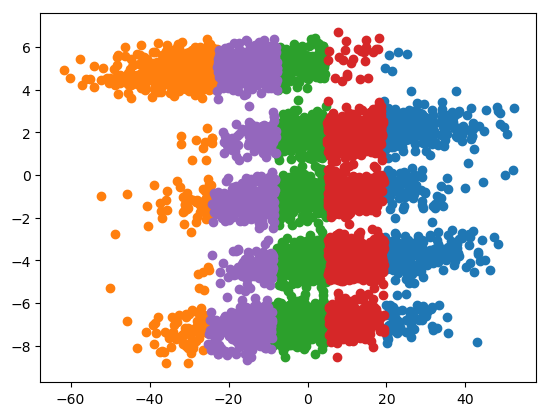

In [84]:
def plot_with_labels(data, labels):
    fig, ax = plt.subplots()
    for lb in np.unique(labels):
        data_with_label = data[labels == lb,:]
        ax.scatter(data_with_label[:,0],
                   data_with_label[:,1],
                   label=lb)
    plt.show()

plot_with_labels(df_truck, labels_truck_euclidean)

### 1c
By visually examining the scatter plot, I see 5 clusters, thus k = 5 is a logical choice for this dataset. After plotting, I noticed that it doesn't cluster in the way I expected. The labels generated cluster the data into vertical stripes. I think it is because the variance of the data on the x-axis is much larger than the variance on the y-axis. As a result, the euclidean distances between data points are dominated by the distances on the x-axis. Using another initialization does not change the situation, the clusters will still form stripes.

## Question 2
### 2a

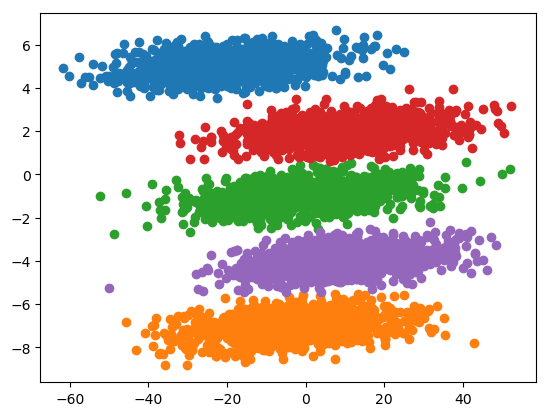

In [85]:
p = np.array([[10, 0.5], [-10, 0.25]])
p_inv = np.linalg.inv(np.dot(p.T, p))

def distance_mahalanobis(x, y):
    ans = 0
    for i in range(2):
        for j in range(2):
            ans += (x[i] - y[i]) * p_inv[i][j] * (x[j] - y[j])
    return ans

labels_truck_mahalanobis = kmeans(df_truck, 5, ini_truck, distance_mahalanobis)
plot_with_labels(df_truck, labels_truck_mahalanobis)

I noticed that the data is clustered as expected.

### 2b

In [86]:
def get_principle_components(data):
    covariance_matrix = np.cov(data.T)
    eigenvalues, eigenvectors = np.linalg.eig(covariance_matrix)
    order = eigenvalues.argsort()[::-1]
    eigenvectors = eigenvectors[:, order]
    return eigenvectors[:, :2]

print(f"Principle components of the aggregate data:"
      f"\n{get_principle_components(df_truck)}")

Principle components of the aggregate data:
[[ 0.99838317  0.05684225]
 [-0.05684225  0.99838317]]


### 2c

In [87]:
for i in range(5):
    print(f"Principle components2 of cluster{i}:"
          f"\n{get_principle_components(df_truck[labels_truck_mahalanobis == i])}\n")

Principle components2 of cluster0:
[[ 0.99993527 -0.01137789]
 [ 0.01137789  0.99993527]]

Principle components2 of cluster1:
[[ 0.99992533 -0.01222027]
 [ 0.01222027  0.99992533]]

Principle components2 of cluster2:
[[ 0.99990986 -0.01342629]
 [ 0.01342629  0.99990986]]

Principle components2 of cluster3:
[[ 0.99993306 -0.01157047]
 [ 0.01157047  0.99993306]]

Principle components2 of cluster4:
[[ 0.99989374 -0.01457781]
 [ 0.01457781  0.99989374]]



They are not the same as the aggregate data. They are not the same as each other.

### 2d

In [88]:
eigenvalues, eigenvectors = np.linalg.eig(p.T @ p)
p_prime = np.diag(eigenvalues) @ eigenvectors
p_prime

array([[ 2.00015624e+02, -2.50371560e+00],
       [ 3.51974851e-03,  2.81183971e-01]])

P' projects the data onto the principal components.

## Question 3

### 3a
{1, 2, 3, 4}, {1, 2, 3, 5}, {1, 2, 4, 5}, {1, 3, 4, 5}, {2, 3, 4, 5}

### 3b
{1, 2, 3, 4}, {1, 2, 3, 5}, {1, 2, 4, 5}, {1, 3, 4, 5}, {2, 3, 4, 5}

### 3c
{1, 2, 3, 4}

## Question 4

### 4a
There are 602 possible association rules.

### 4b
The confidence of the rule {Milk, Diapers} ⇒ {Butter} is 0.5

### 4c
The support for the rule {Milk, Diapers} ⇒ {Butter} is 0.2

### 4d
True. Because {a,b} is a subset of {a,b,c,d}, the support of {a,b} is always equal or larger than the support of {a,b,c,d}. Since {a,b,c,d} is a frequent itemset, {a,b} with an equal or larger support is always a frequent itemset.

### 4e
False. It's possible for {a,b,c} to have zero support.

### 4f
False. The support of {b} should always be equal or larger than the support of its subsets. Because each time {b,c} occurs, {b} occurs. So the support of {b} cannot be smaller than 30.

### 4g
False. The maximum number of size-2 frequent itemsets that can be extracted (assuming minsup > 0) is C(5,2), which is 10.

### 4h
See next page.